# Problam Statement

Credit card fraud is a serious problem that costs banks and customers millions each year. Our goal is to build a computer program that can help catch fraud as it happens, so people don't lose money.

# Objective

We want to create a smart system that looks at people's credit card transactions and figures out if they're normal or suspicious. By teaching the computer to spot unusual patterns, we can stop fraudsters in their tracks.

# About the dataset

This Dataset have 473 Fraud out of 284807 transaction.it is highly unbalanced.

Time: The time elapsed since the first transaction in seconds. This column provides temporal information about when each transaction occurred.

V1-V28: These columns contain anonymized features resulting from a PCA transformation for confidentiality reasons. They likely represent different aspects of the transaction, such as amount, location, etc.

Amount: The transaction amount in the local currency. This column represents the monetary value of each transaction.

Class: This is the target variable, indicating whether a transaction is fraudulent (1) or not (0). It serves as the label for the classification task in the fraud detection model.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("cedit card fraud detection.csv")

In [6]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.shape

(284807, 31)

In [9]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
df.shape

(284807, 31)

# Exploratory Data Analysis

In [13]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [14]:
df['Amount'].mean()

88.34961925093133

In [15]:
df['Amount'].max()

25691.16

In [16]:
df['Amount'].median()

22.0

In [17]:
df.duplicated().sum()

1081

In [18]:
df.drop_duplicates(df,inplace=True)

In [19]:
df['Class'].value_counts()


Class
0    283253
1       473
Name: count, dtype: int64

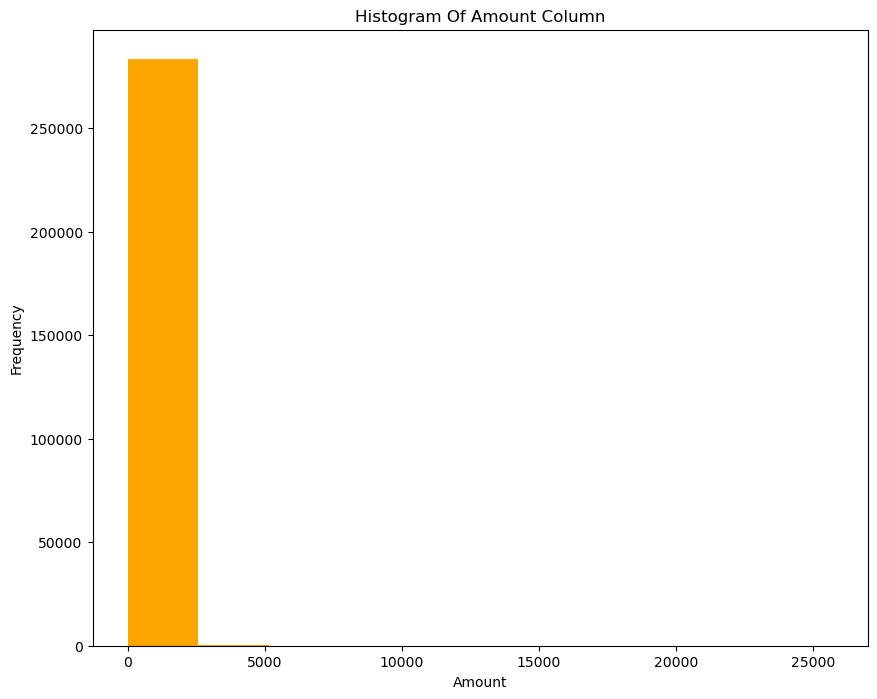

In [20]:
plt.figure(figsize =(10,8))
plt.hist(df["Amount"],color = 'orange')
plt.title("Histogram Of Amount Column")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

In [21]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

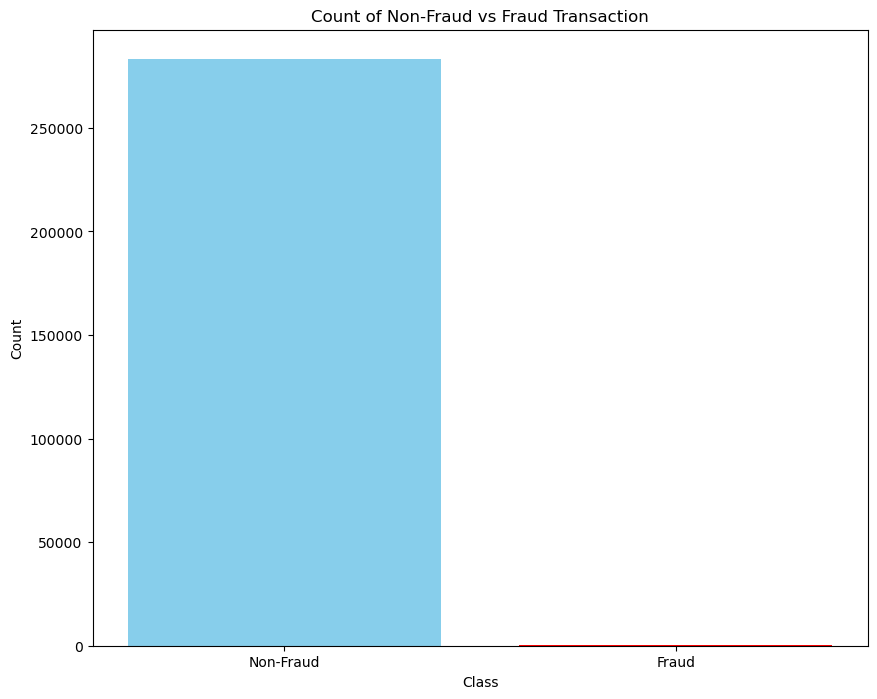

In [22]:
counts = [283253,473]
classes = ['Non-Fraud','Fraud']

plt.figure(figsize = (10,8))
plt.bar(classes,counts,color=['skyblue','red'])
plt.title("Count of Non-Fraud vs Fraud Transaction")
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [23]:
fraud_data = df[df['Class']==1]

normal_data = df[df['Class']==0]

print("Shape of fraud data:",fraud_data.shape)
print("Shape of normal data:",normal_data.shape)

Shape of fraud data: (473, 31)
Shape of normal data: (283253, 31)


In [24]:
fraud_data.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [25]:
normal_data.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

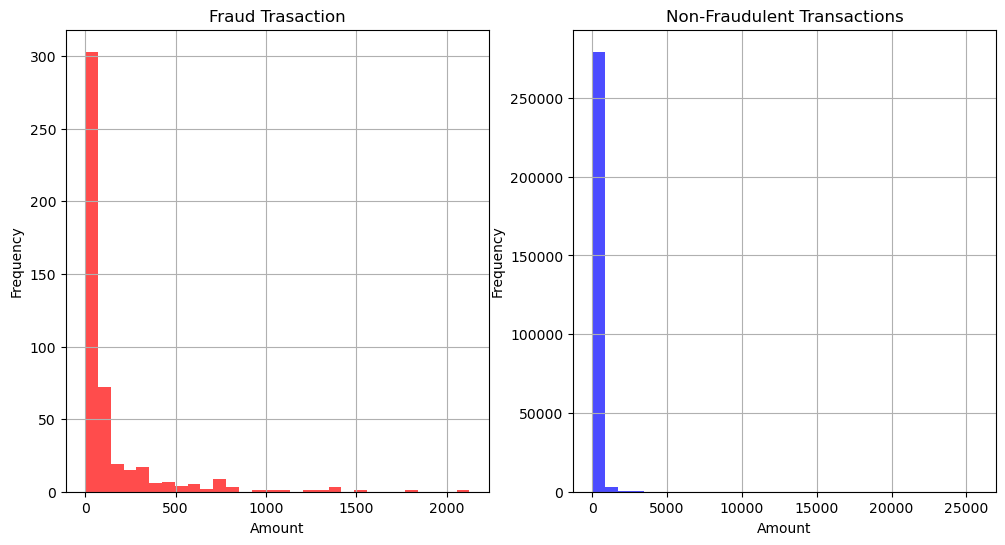

In [26]:
fraud_data = df[df['Class'] == 1]
non_fraud_data = df[df['Class'] == 0]

plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
plt.hist(fraud_data['Amount'],bins = 30,color = 'red',alpha =0.7)
plt.title('Fraud Trasaction')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(True)


plt.subplot(1,2,2)
plt.hist(non_fraud_data['Amount'], bins=30, color='blue', alpha=0.7)
plt.title('Non-Fraudulent Transactions')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(True)


plt.show()

In [27]:
corr = df.corr()

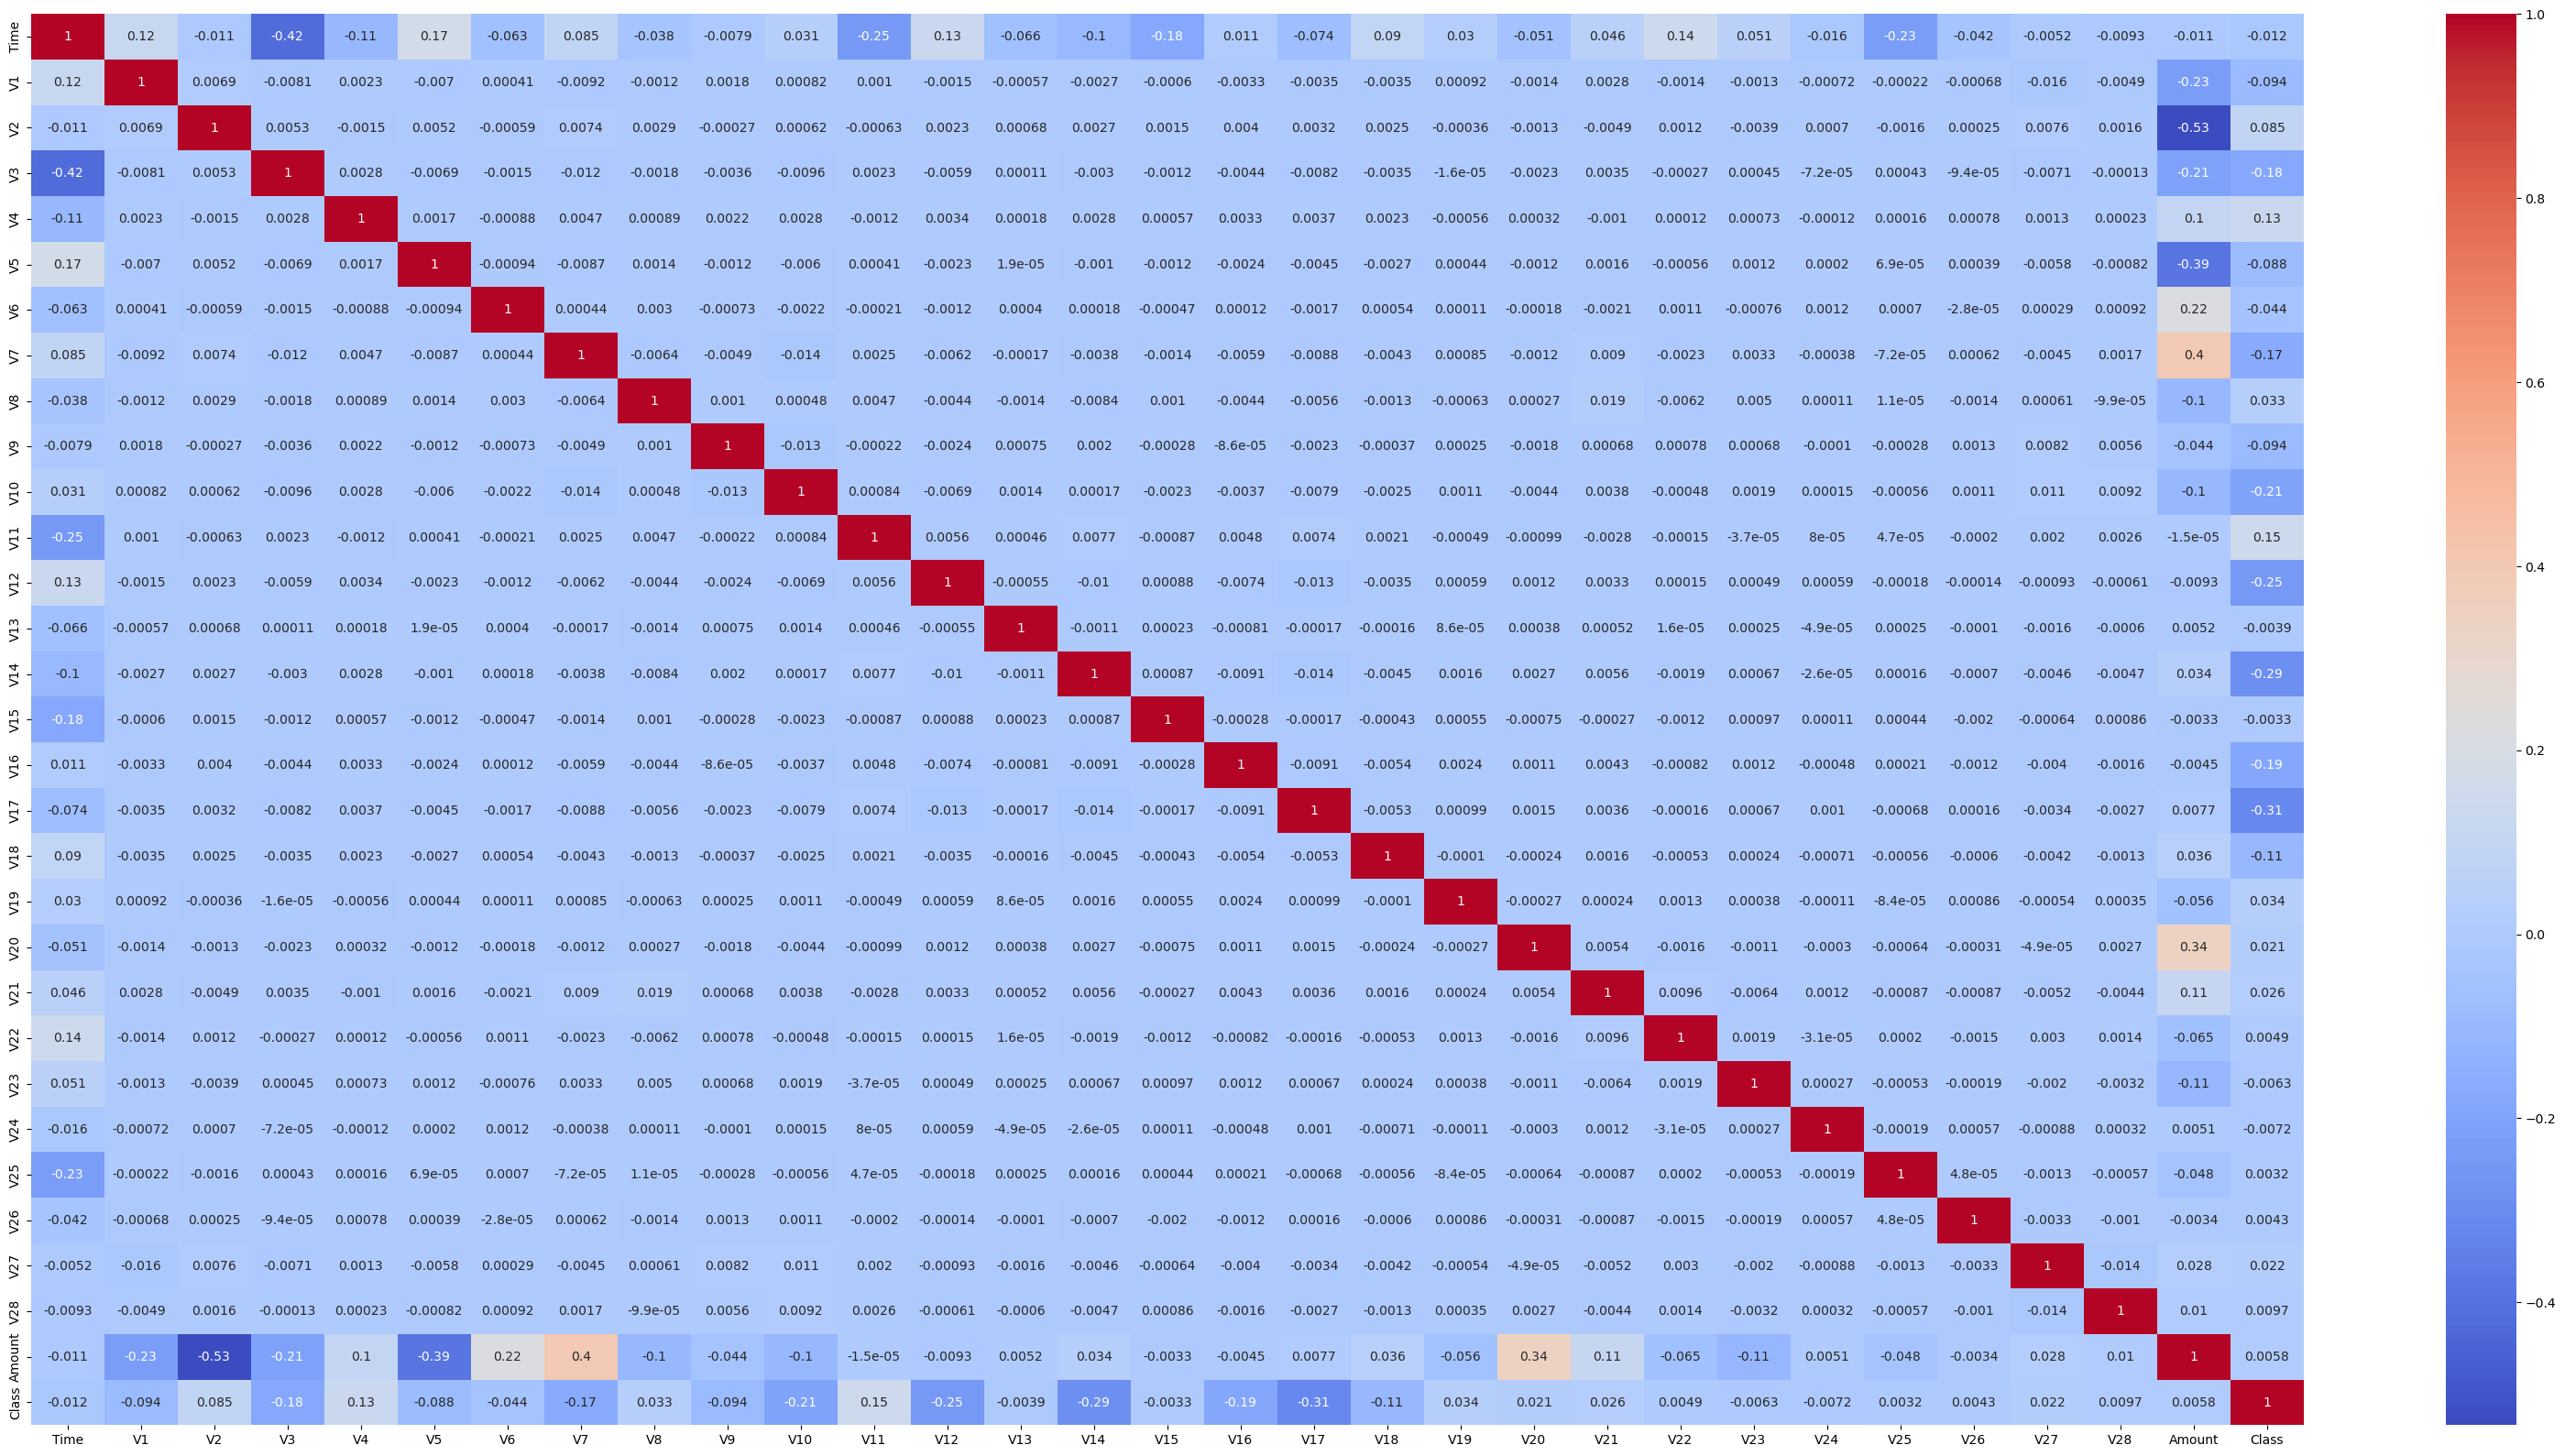

In [28]:
plt.figure(figsize = (40,20))
sns.heatmap(corr,cmap = "coolwarm",annot = True)
plt.show()

In [29]:
classes = df['Class'].value_counts()
non_fraud_transa = classes[0]/df['Class'].count()*100
fraud_transa = classes[1]/df['Class'].count()*100
print(non_fraud_transa)
print(fraud_transa)

99.83328986416473
0.1667101358352777


In [30]:
x = df.drop(columns = ['Class'],axis = 1)
y = df.Class

In [31]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [32]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 283726, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42 , stratify=y)

In [35]:
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
257334,158114.0,2.139297,-2.379957,-0.588094,-2.116887,-0.151810,4.930636,-3.133495,1.408309,0.431508,...,-0.379746,-0.073778,0.629693,0.241327,0.738886,-0.314844,0.044060,0.139812,-0.034152,13.50
118498,75102.0,-2.150992,0.447565,0.584405,1.181052,0.180772,-1.200828,-0.106578,0.771604,-1.441208,...,0.028937,-0.066225,-0.869480,-0.041398,0.501689,-0.198083,-0.732049,-0.234089,-0.221309,0.02
120679,75921.0,-6.000510,-5.868708,-1.210423,2.234168,-0.925608,0.019870,0.012067,0.910109,-0.905567,...,0.545803,-0.132715,-0.755490,0.460192,-0.747164,-0.243348,-0.205593,0.915416,-1.136679,543.56
163000,115559.0,2.021325,-0.535640,-0.416146,-0.124310,-0.178832,0.918878,-1.042599,0.318182,1.072180,...,-0.078728,0.020950,0.209552,0.220896,-0.311931,-0.459092,0.495448,-0.012725,-0.051766,1.00
171948,120888.0,0.149536,0.807852,-0.590906,-0.509802,1.145394,-1.116329,0.935687,-0.234237,0.014499,...,-0.122272,0.220651,0.679815,-0.349294,-0.734172,0.185243,-0.114120,0.027129,0.015322,4.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265101,161742.0,-2.249534,2.863445,-2.585840,-1.118908,-0.261445,-1.934203,0.254788,1.252018,-0.372203,...,0.017516,0.302692,0.840775,0.009050,-0.038346,0.000973,0.122236,0.320758,0.256439,0.15
225116,144113.0,-0.098309,-0.382823,0.202726,-0.732301,0.336342,-0.253872,0.837947,-0.402611,-1.424484,...,0.028820,0.154790,1.009327,0.002124,-0.462865,-0.422526,0.010597,0.041090,-0.004501,124.00
3525,3013.0,-1.708940,-1.296255,1.953170,-2.277028,-0.510388,0.408807,0.329231,0.477331,1.058119,...,0.557379,0.466843,0.860939,0.361317,-0.264732,0.423478,0.065689,-0.026392,0.077562,261.80
60594,49395.0,1.247036,0.348595,0.589407,0.982998,-0.222000,-0.452687,-0.012336,-0.140168,0.052173,...,-0.042753,-0.211495,-0.556038,0.037106,-0.133330,0.403622,-0.595756,0.043911,0.032002,5.00


In [36]:
x_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
139330,83104.0,-1.684059,1.500809,0.759888,0.550576,0.232439,-0.043998,0.626440,-0.004514,-0.004855,...,0.252636,0.099876,0.702279,-0.194992,0.034693,-0.271951,-0.402507,-0.359649,-0.093177,19.45
86361,61199.0,-0.712760,0.946364,1.613294,-0.057937,0.307252,0.033698,0.842808,-0.082649,-0.286508,...,0.043267,-0.209533,-0.489587,-0.374907,-0.405319,0.492170,0.339188,-0.107684,0.052013,31.35
94117,64741.0,1.194627,0.202019,0.148443,0.456065,-0.024289,-0.105957,-0.146632,0.140367,-0.109165,...,-0.134548,-0.237956,-0.716717,0.114452,-0.366347,0.135195,0.129319,-0.014949,0.012339,0.89
123803,77071.0,1.191219,-0.686249,0.413138,0.261424,-0.634744,0.624022,-0.717510,0.123673,-0.737618,...,-0.297845,-0.214390,-0.138765,-0.283669,-0.835391,0.646958,-0.177545,0.063255,0.026668,83.50
126884,78136.0,0.807040,-1.845157,1.160044,-0.078988,-1.973917,0.492741,-1.211037,0.286344,0.606206,...,0.443070,0.253705,0.462592,-0.229476,0.129784,0.251871,-0.111874,0.038918,0.063682,250.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50356,44460.0,0.638047,-1.246874,-0.314736,-0.264836,-0.031902,1.266928,-0.033675,0.308927,-1.625736,...,-0.045994,-0.403602,-1.210534,0.097523,-1.033980,-0.251935,0.220138,-0.018670,0.037997,279.90
274698,166166.0,2.027942,0.034329,-2.411462,0.160815,0.870687,-1.269340,0.984068,-0.611409,0.190407,...,-0.069285,0.184379,0.603199,-0.225128,-0.659959,0.670756,-0.379132,-0.040148,-0.063864,70.00
269159,163558.0,2.030605,0.148455,-1.765004,0.556354,0.135904,-1.471860,0.228982,-0.333116,0.691840,...,-0.237780,0.192819,0.687191,-0.014358,-0.104785,0.211153,-0.096818,-0.004184,-0.029435,11.99
42212,40998.0,0.961080,-0.816486,1.540157,1.011783,-1.196358,1.353506,-1.253677,0.625705,1.655494,...,-0.079521,-0.015309,0.313640,-0.123588,-0.228378,0.305133,0.513930,0.053458,0.018343,59.50


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

In [38]:
sc = StandardScaler()
# X_train = sc.fit_transform(x_train)
# X_test = sc.transform(x_test)

x_train["Amount"] = sc.fit_transform(x_train[["Amount"]])
x_test["Amount"] = sc.transform(x_test[["Amount"]])

In [47]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train , y_train)
lg_y_pred = lg.predict(x_test)

C:\Users\Guest User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
score = accuracy_score(lg_y_pred,y_test)

In [49]:
score

0.9990013863107686

In [50]:
cf = classification_report(lg_y_pred,y_test)

In [54]:
print(cf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84973
           1       0.71      0.70      0.70       145

    accuracy                           1.00     85118
   macro avg       0.86      0.85      0.85     85118
weighted avg       1.00      1.00      1.00     85118



In [65]:
f1 = f1_score(lg_y_pred,y_test)
f1

0.7038327526132404

In [56]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_y_pred = dt.predict(x_test)


In [57]:
score = accuracy_score(dt_y_pred,y_test)

In [59]:
score

0.999071876688832

In [61]:
cf = classification_report(dt_y_pred,y_test)

In [63]:
print(cf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84981
           1       0.70      0.73      0.72       137

    accuracy                           1.00     85118
   macro avg       0.85      0.86      0.86     85118
weighted avg       1.00      1.00      1.00     85118



In [64]:
f1 = f1_score(dt_y_pred,y_test)
f1

0.7168458781362007

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_y_pred = rf.predict(x_test)

In [67]:
score = accuracy_score(rf_y_pred,y_test)

In [68]:
score

0.9995653093352758

In [69]:
cf = classification_report(rf_y_pred,y_test)

In [70]:
print(cf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85005
           1       0.77      0.96      0.85       113

    accuracy                           1.00     85118
   macro avg       0.88      0.98      0.93     85118
weighted avg       1.00      1.00      1.00     85118



In [72]:
f1 =f1_score(rf_y_pred,y_test)
f1

0.8549019607843137